In [427]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Keras
import keras
from keras import models
from keras import layers
import os
from os import listdir
from os.path import isfile, join
from sklearn.metrics import accuracy_score

In [428]:
# reading dataset from csv

data = pd.read_csv('/content/drive/MyDrive/last_dataframe/dataframe.csv')
data.head()

,song_name,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,polarity
0,3 Doors Down - Here Without You.mp3,0.289081,0.160753,1875.872919,2086.083922,3839.096230,0.080104,-120.545860,116.146255,-16.438173,19.856920,8.485702,2.506660,-3.166045,8.248993,-4.593847,3.245874,-7.299800,-3.464103,-4.438722,-2.127836,-4.158795,2.548140,-8.946958,2.383594,-10.388559,-5.975074,1
1,Adam Lambert - Whataya Want from Me.mp3,0.355750,0.221183,2530.576767,2542.919690,5433.608810,0.106720,-65.254929,77.532669,-2.125923,21.865522,4.198352,7.828147,-0.858891,7.609436,-3.958881,9.978322,-3.432103,3.356047,-0.555968,2.435497,-1.882958,-0.076031,-3.791277,2.699635,-1.652489,3.940006,1
2,Adele - Easy On Me.mp3,0.262327,0.181580,1918.322782,2243.506341,4388.587352,0.069737,-158.698792,119.309517,24.319859,4.387904,8.045565,0.722870,-0.630070,-0.427301,-7.314075,0.097219,-3.554989,2.845815,-3.271787,-3.322470,0.601871,-6.692018,-1.598950,7.785903,-1.588815,10.148050,1
3,Adele - Make You Feel My Love.mp3,0.292123,0.116284,1064.064225,1427.885838,1986.143546,0.046679,-222.517914,161.673782,2.692116,18.453976,15.061804,4.141805,7.677796,3.358838,-1.729402,3.427923,-3.567879,3.343680,-6.928495,1.509124,-4.121449,-11.299839,-4.258877,-2.200528,-4.374411,-1.815166,1
4,"Alan Walker, Ava Max - Alone, Pt. II.mp3",0.338901,0.231402,2337.968667,2517.650456,4869.673332,0.102979,-78.251495,95.489693,-13.360953,18.664076,5.021566,-5.919396,9.094955,-14.101453,6.228594,2.170338,-5.768901,2.130660,-7.129215,1.655985,-6.318650,1.480218,-0.576925,5.278685,-3.926069,6.590695,0


In [429]:
data = data.sample(frac = 1, random_state = 10).reset_index(drop=True)
data.head()

,song_name,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,polarity
0,"Bahamas, Madison Cunningham - Be My Witness (f...",0.342932,0.163363,1569.343678,1985.084157,3427.707051,0.059877,-148.713455,135.504669,11.027342,9.079230,4.938859,8.033958,1.724665,5.862593,-2.638314,-0.188930,-2.908784,0.817397,-0.625243,1.664817,-2.294284,3.367950,-3.857531,-1.557467,-4.445862,0.289576,0
1,The Offspring - The Kids Aren't Alright.mp3,0.410226,0.235695,2432.832611,2344.959235,4965.686640,0.119506,-3.456875,90.056816,-25.072218,35.620579,3.521940,9.377223,1.949379,8.820065,-2.579929,2.762347,-6.155899,-2.072496,-7.041440,-2.466044,-7.760959,-2.373715,-8.303421,-0.855154,-4.360817,1.856898,0
2,Faith Hill - Breathe.mp3,0.324153,0.148818,2436.451795,2607.899245,5355.862058,0.111220,-127.268867,87.350380,3.662381,23.461323,11.766034,4.253119,1.122955,3.154954,-3.830454,-0.346356,-8.980983,-3.161658,-7.834926,0.489897,-6.119314,0.637559,-5.098304,0.529420,-4.044796,-0.622057,0
3,The Skatalites - Eastern Standard Time.mp3,0.442773,0.123286,2396.140950,2252.489331,4762.382314,0.126297,-97.405205,82.513336,-27.231873,38.098129,1.027291,17.161999,0.790710,14.947618,-3.350340,3.242716,1.628361,8.827895,-7.340616,5.602109,-2.157922,7.205108,-4.342024,4.456456,-3.218498,4.762727,0
4,Albert Collins - Blue Monday Hangover - Remast...,0.384747,0.133702,2171.121864,2217.921091,4447.700883,0.111578,-129.032272,93.447449,-8.623260,35.570011,8.690108,21.814556,-7.128942,5.432218,-1.711244,6.162547,-0.728043,3.287340,-3.296253,1.308170,-3.502340,-0.205946,-5.999989,3.092426,-2.910830,2.285146,1


In [430]:
x = data.iloc[0:100, 1:]
y = np.array([1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1])
X_test = data.iloc[100:, 1:]
#train-test split
X_train, validation_x, y_train, validation_y = train_test_split(x,y,test_size=0.25)

In [431]:
# normalizing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
validation_x = scaler.fit_transform(validation_x)
X_test = scaler.fit_transform(X_test)

In [432]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, metric="minkowski")
knn.fit(X_train, y_train)                             
y_pred = knn.predict(validation_x)

unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))
print("Accuracy :", accuracy_score(validation_y, y_pred))

{0: 13, 1: 12}
Accuracy : 0.6


In [433]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(validation_x)

unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))
print("Accuracy :", accuracy_score(validation_y, y_pred))

{0: 16, 1: 9}
Accuracy : 0.8


In [434]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0)
logr.fit(X_train, y_train)
y_pred = logr.predict(validation_x)

unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))
print("Accuracy :", accuracy_score(validation_y, y_pred))

{0: 17, 1: 8}
Accuracy : 0.84


In [435]:
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(X_train.shape[1],)))
#model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [436]:
history = model.fit(X_train,
                    y_train,
                    epochs=40,
                    batch_size=4,
                    validation_data=(validation_x, validation_y))

Epoch 1/40
19/19 [==============================] - 1s 11ms/step - loss: 1.1119 - accuracy: 0.2667 - val_loss: 1.1318 - val_accuracy: 0.3200
Epoch 2/40
19/19 [==============================] - 0s 5ms/step - loss: 0.9940 - accuracy: 0.3067 - val_loss: 1.0141 - val_accuracy: 0.4000
Epoch 3/40
19/19 [==============================] - 0s 3ms/step - loss: 0.9088 - accuracy: 0.3200 - val_loss: 0.9071 - val_accuracy: 0.4000
Epoch 4/40
19/19 [==============================] - 0s 4ms/step - loss: 0.8368 - accuracy: 0.3733 - val_loss: 0.8251 - val_accuracy: 0.4400
Epoch 5/40
19/19 [==============================] - 0s 3ms/step - loss: 0.7782 - accuracy: 0.4400 - val_loss: 0.7671 - val_accuracy: 0.4000
Epoch 6/40
19/19 [==============================] - 0s 4ms/step - loss: 0.7320 - accuracy: 0.5200 - val_loss: 0.7194 - val_accuracy: 0.4800
Epoch 7/40
19/19 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.5600 - val_loss: 0.6781 - val_accuracy: 0.6400
Epoch 8/40
19/19 [=

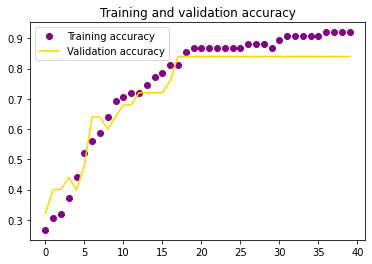

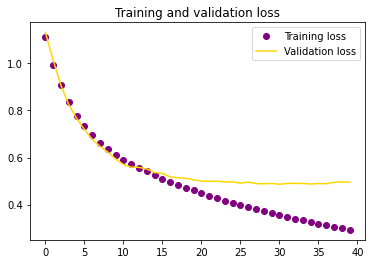

In [448]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='purple')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy', color='gold')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss', color='purple')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color='gold')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [437]:
names = pd.DataFrame(data.iloc[100:, :1].values, columns = ["song_names"])
values = pd.DataFrame(model.predict(X_test), columns = ["values"])
recommend_df = pd.concat([names, values], axis=1).sort_values("values", ascending=False).reset_index(drop=True)
recommend_df

,song_names,values
0,"Doja Cat, SZA - Kiss Me More (feat. SZA).mp3",0.996204
1,"Mykola Dmytrovych Leontovych, John Williams - ...",0.989331
2,"BENEE, Gus Dapperton - Supalonely (feat. Gus D...",0.988948
3,Ava Max - Kings & Queens.mp3,0.985310
4,"B.o.B, Bruno Mars - Nothin' on You (feat. Brun...",0.984788
...,...,...
1536,"Louis Armstrong, The Commanders - Cool Yule.mp3",0.006255
1537,The Beatles - Come Together - Remastered 2009.mp3,0.005699
1538,Bing Crosby - I'll Be Home For Christmas.mp3,0.003882
1539,Elmore James - The Sky Is Crying.mp3,0.003125


In [438]:
print("RECOMMENDED SONGS:")
for i in range(20):
    print(recommend_df["song_names"][i])

RECOMMENDED SONGS:
Doja Cat, SZA - Kiss Me More (feat. SZA).mp3
Mykola Dmytrovych Leontovych, John Williams - Carol of the Bells.mp3
BENEE, Gus Dapperton - Supalonely (feat. Gus Dapperton).mp3
Ava Max - Kings & Queens.mp3
B.o.B, Bruno Mars - Nothin' on You (feat. Bruno Mars).mp3
Kenny Dorham - Alone Together - Rudy Van Gelder Remaster.mp3
Ariana Grande - positions.mp3
Bellatrax, Sophia May - I Can’t Help Myself (feat. Sophia May) - Radio Edit.mp3
Sonny Clark - Cool Struttin'.mp3
Alan Walker, Ava Max - Alone, Pt. II.mp3
Pharrell Williams - Happy - From 'Despicable Me 2'.mp3
T-Pain, Yung Joc - Buy U a Drank (Shawty Snappin') (feat. Yung Joc).mp3
Aaliyah - Rock The Boat.mp3
BENEE - Doesn't Matter.mp3
Pharrell Williams, JAY-Z - Frontin' (feat. Jay-Z) - Club Mix.mp3
Ella Fitzgerald, Louis Armstrong - Autumn In New York.mp3
Dua Lipa - Break My Heart.mp3
Lee Konitz, Warne Marsh - Two Not One.mp3
Florence + The Machine - Dog Days Are Over.mp3
Mariah Carey - We Belong Together.mp3
